In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


In [2]:
!pip install termcolor


### Loading Data :

In [2]:
data = pd.read_csv('Clean_Dataset.csv')
df=pd.DataFrame(data)
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [33]:
# Count of duplicate rows :
df.duplicated().sum()


0

In [34]:
#Deleting duplicate rows

df = df.drop_duplicates()

In [3]:
x=df['price'].unique()

In [6]:
len(x)

12157

In [4]:
# Convert the 'price' column to numeric, forcing non-numeric values to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [5]:
# Drop rows with NaN values in the 'price' column
df = df.dropna(subset=['price'])

# Reset the index if desired (optional)
df = df.reset_index(drop=True)


In [6]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Reset the index if desired (optional)
df.reset_index(drop=True, inplace=True)

In [41]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [53]:
# looking for null values :

df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [42]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
# dropping unwanted columns :

df.drop(columns='Unnamed: 0', inplace=True)

In [39]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
# Print all columns and their indexes.
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : Unnamed: 0
1 : airline
2 : flight
3 : source_city
4 : departure_time
5 : stops
6 : arrival_time
7 : destination_city
8 : class
9 : duration
10 : days_left
11 : price


In [10]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [8]:
# Renaming column :

df.rename(columns={'class': 'flight_class'}, inplace=True)

In [9]:
# Filtering data for under30 days left :

df = df[df['days_left'] < 31]


## EDA  :

<Axes: xlabel='airline', ylabel='price'>

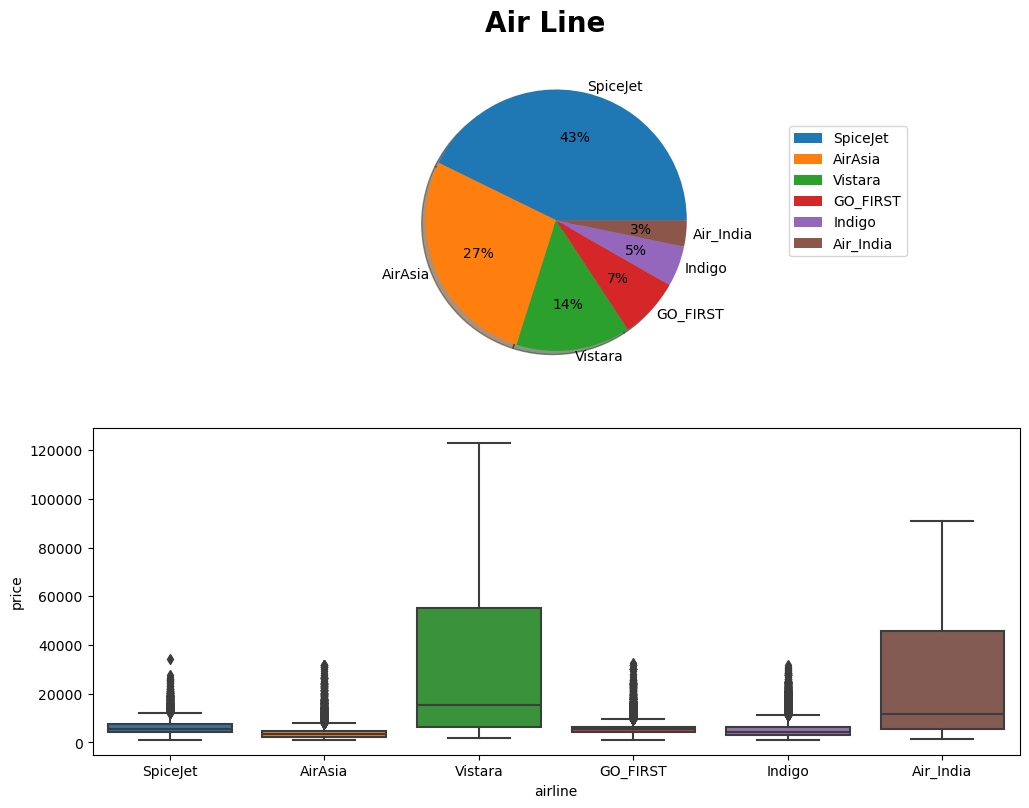

In [14]:
# defining the layout

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top axis 

labels = df.airline.unique().tolist()
#explode = (0, 0, 0, 0, 0, 0.5) makes which item to popout 

ax[0].pie(df.airline.value_counts(),autopct='%.f%%', labels=labels, shadow=True, pctdistance=0.65, labeldistance=1.05)

ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='airline', y='price', data=data, ax=ax[1])

#### Inference :
- Majority share holded by Vistara and Airasia
- Air India and Indigo has its least share
- Outlayers are present in the data which needed to be treated 

In [14]:
df.source_city.value_counts()

source_city
Mumbai       36576
Delhi        36435
Bangalore    30992
Kolkata      27610
Hyderabad    23974
Chennai      22905
Name: count, dtype: int64

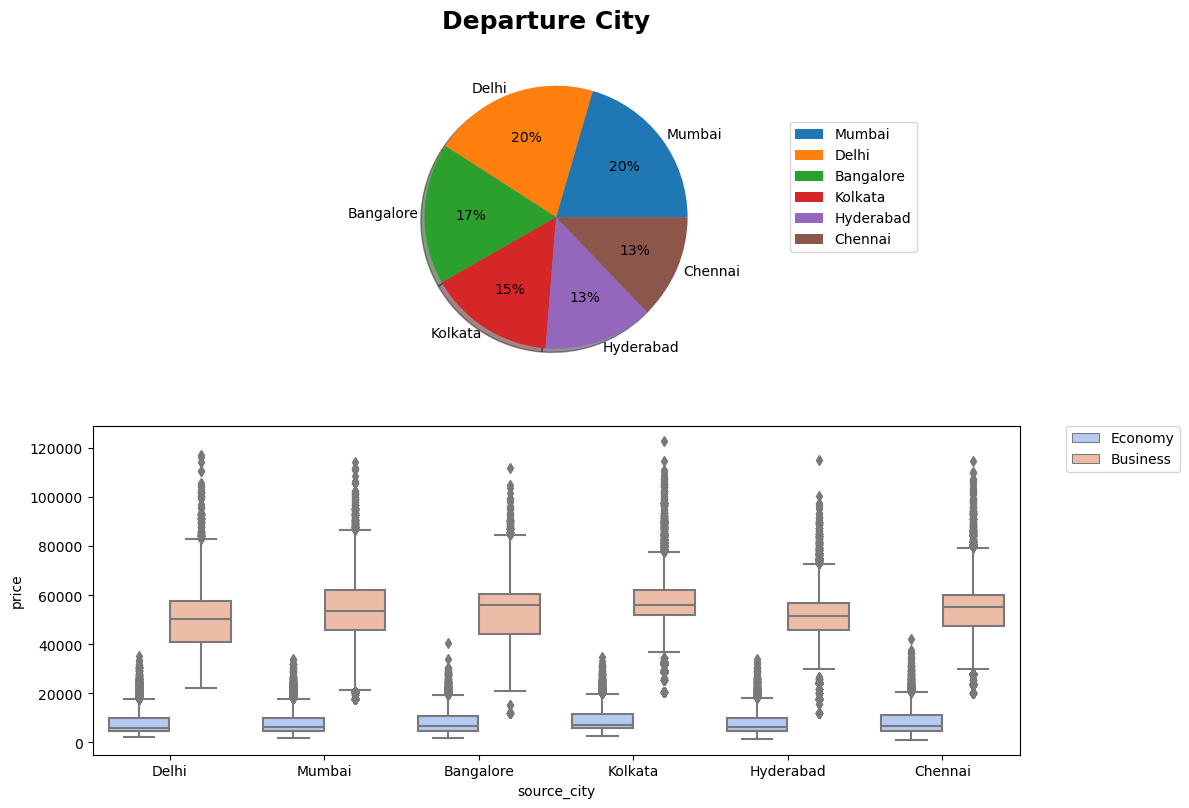

In [15]:
# Departure city chart

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.suptitle('Departure City', fontweight='bold',fontsize=18)
plt.tight_layout()

# Defining colors for the pie chart 

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'peachpuff', 'plum', 'lightpink']


labels = df.source_city.value_counts().index.tolist()

ax[0].pie(df.source_city.value_counts(),autopct='%.f%%', labels=labels, shadow=True, pctdistance=0.65, labeldistance=1.05)

ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom axis
sns.boxplot(x='source_city', y='price', data=df, ax=ax[1],hue='flight_class',palette='coolwarm')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# bbox_to_anchor=(1.05, 1) positions the legend outside the plot area to the right.

# loc='upper left' sets the anchor point of the legend box.

# borderaxespad=0. removes any padding between the plot and the legend.


- Delhi flights are slight cheaper than other with kolkatta being costlier than others

In [46]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
len(data.flight.value_counts())

# Total flights running 

1561

In [10]:
# so deleting the flight column as too many unique values :

df.drop(columns='flight',inplace=True)

In [18]:
df.destination_city.value_counts()

destination_city
Mumbai       35376
Delhi        33892
Bangalore    30317
Kolkata      29588
Hyderabad    25298
Chennai      24021
Name: count, dtype: int64

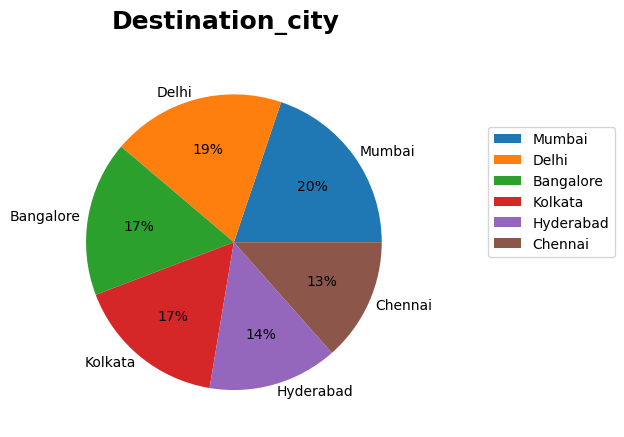

In [19]:
#  city chart

plt.suptitle('Destination_city', fontweight='bold',fontsize=18)
plt.tight_layout()

# Defining colors for the pie chart 

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'peachpuff', 'plum', 'lightpink']


labels = df.destination_city.value_counts().index.tolist()

plt.pie(df.destination_city.value_counts(),autopct='%.f%%', labels=labels, pctdistance=0.65, labeldistance=1.05)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)



In [20]:
df.flight_class.value_counts()

flight_class
Economy     122344
Business     56148
Name: count, dtype: int64

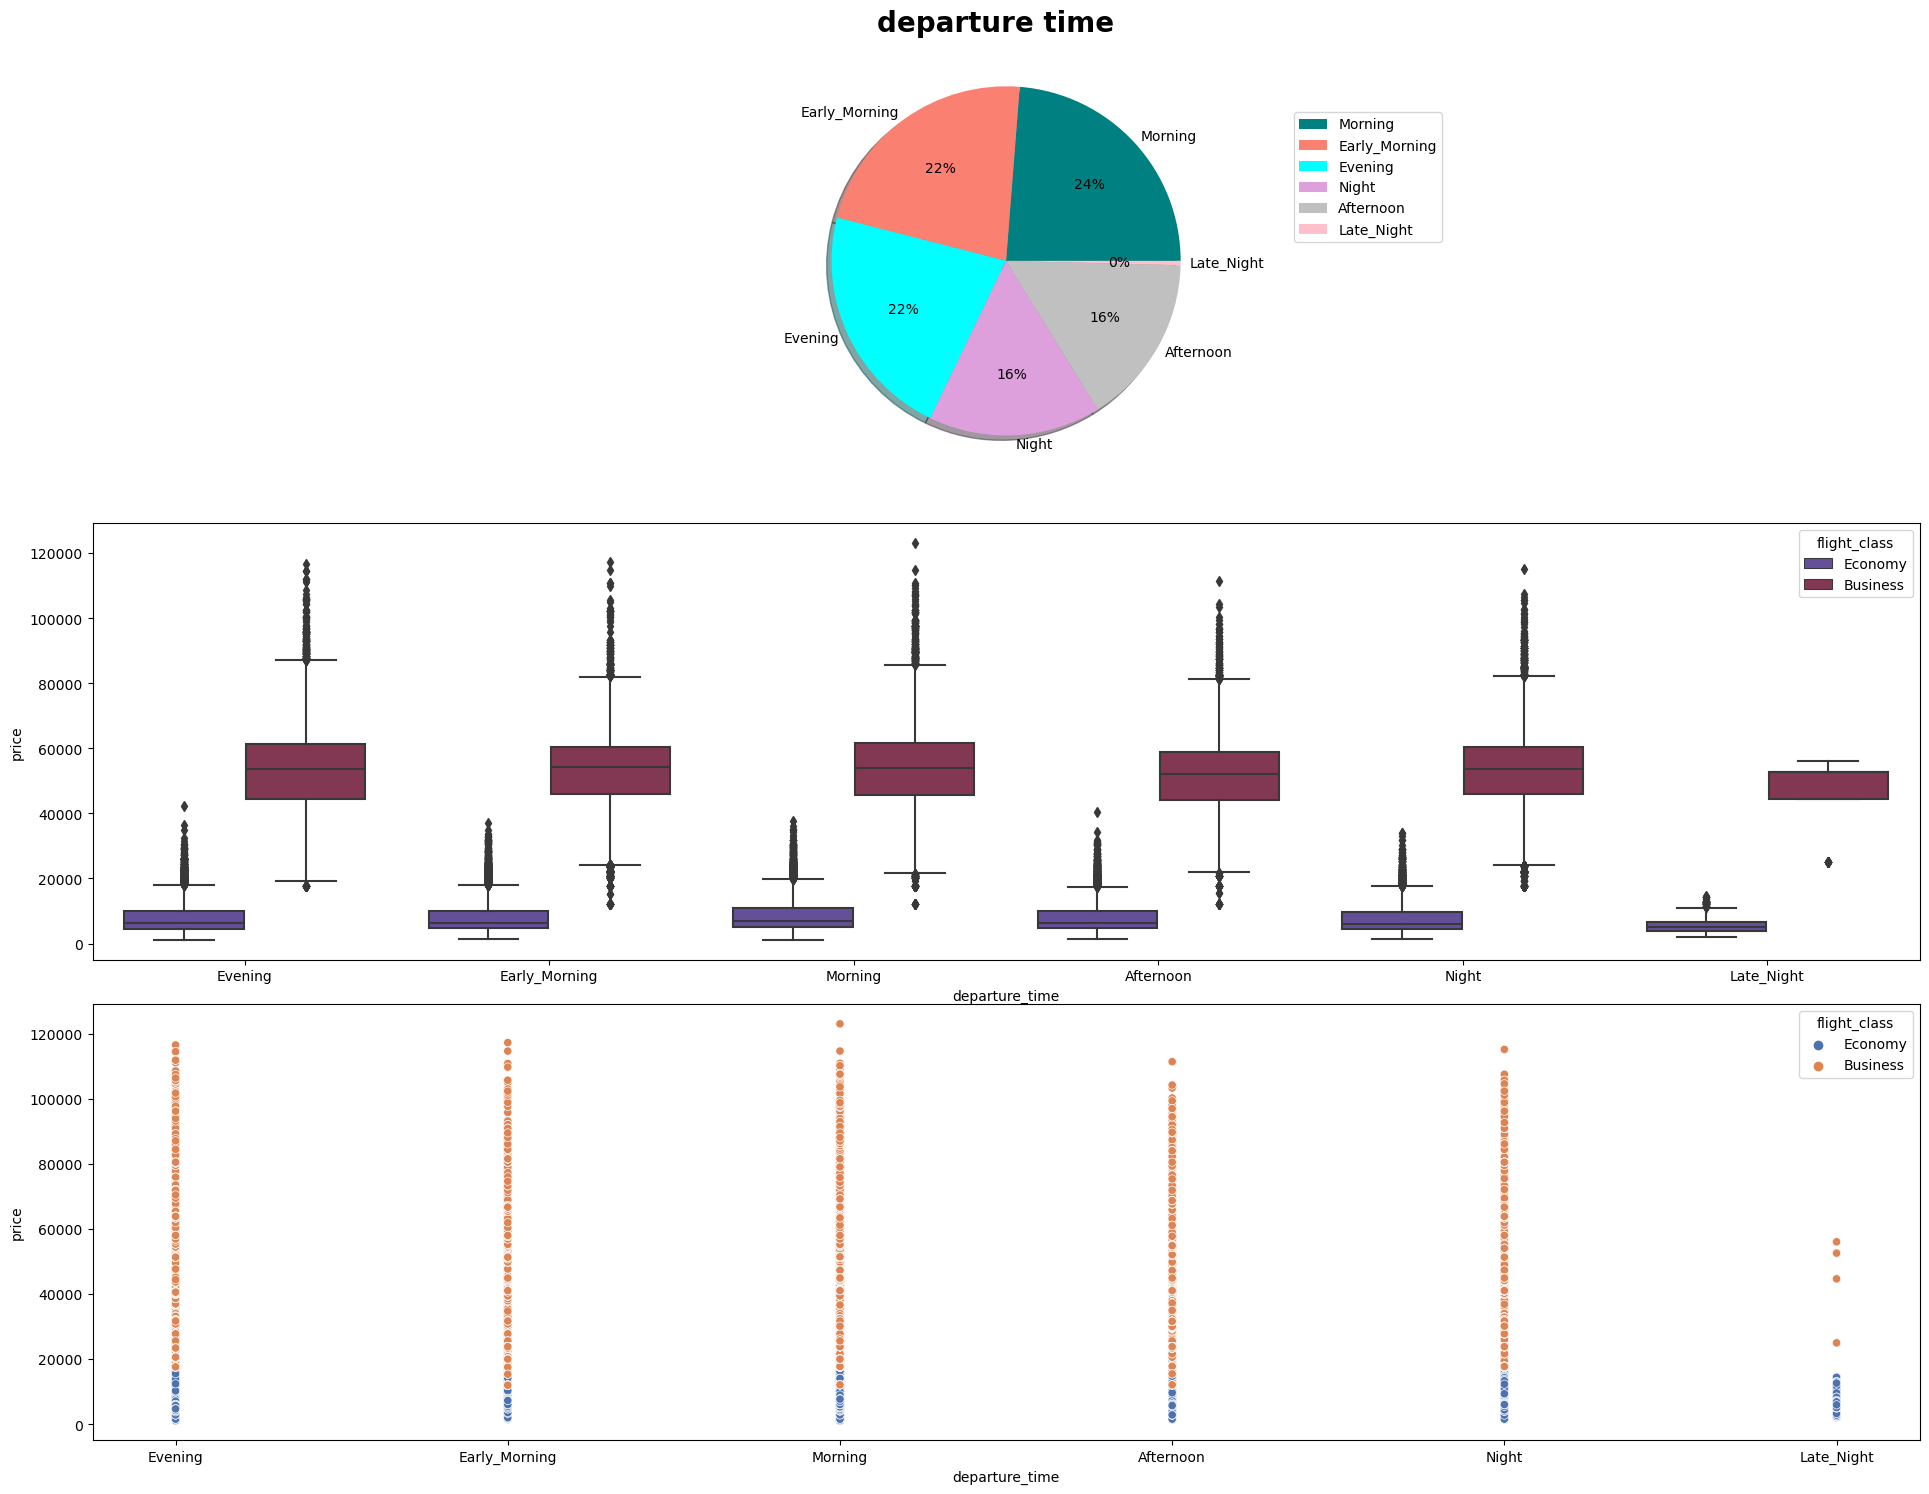

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(19, 15))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()
colors = ['teal', 'salmon', 'aqua', 'plum','silver','pink', 'lightsteelblue']
# Top ax
labels = df.departure_time.value_counts().index.tolist()
#explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=0.65, labeldistance=1.05,colors=colors)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='departure_time', y='price', data=df, ax=ax[1],hue='flight_class',palette='twilight')

# Bottom ax
sns.scatterplot(x='departure_time', y='price', data=df, hue='flight_class',ax=ax[2],palette="deep")

plt.show()

In [22]:
df.stops.value_counts()

stops
one            148734
zero            21425
two_or_more      8333
Name: count, dtype: int64

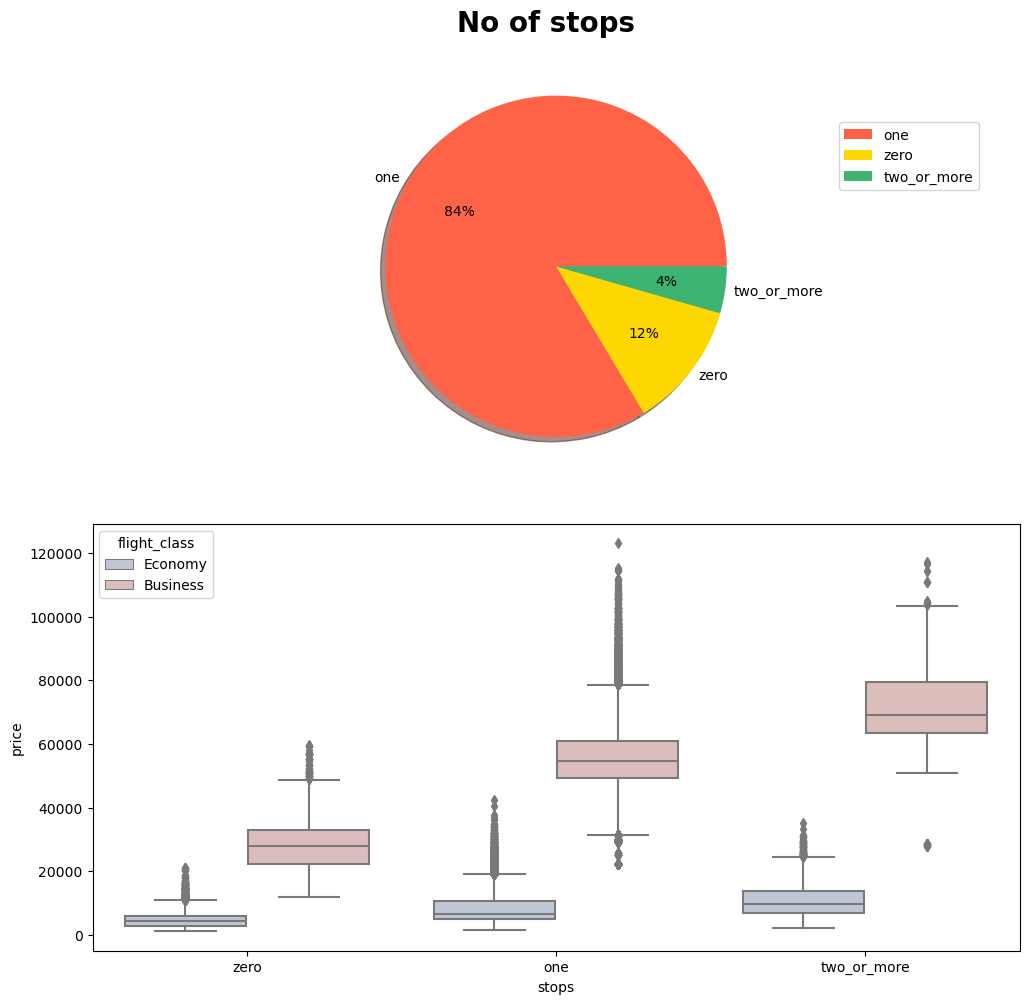

In [23]:

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('No of stops', fontsize=20, fontweight='bold')
plt.tight_layout()
colors = ['tomato', 'gold', 'mediumseagreen']

# Top ax
labels = df.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(data.stops.value_counts(),  autopct='%.f%%', labels=labels, shadow=True, pctdistance=0.65, labeldistance=1.05,colors=colors)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='stops', y='price', data=df, ax=ax[1],hue='flight_class',palette='vlag')
plt.show()

- Flight price increases as the no of stops increases

In [24]:
df.arrival_time.value_counts()

arrival_time
Night            54599
Evening          47231
Morning          37339
Afternoon        22688
Early_Morning     8763
Late_Night        7872
Name: count, dtype: int64

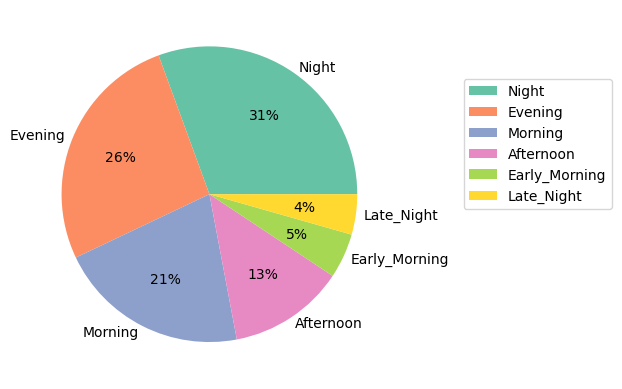

In [25]:
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
colors = ['orchid', 'olive','ivory','coral', 'lightsteelblue']
# Top ax
labels = df.arrival_time.value_counts().index.tolist()
# Define a list of light colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
plt.pie(df.arrival_time.value_counts(),  autopct='%.f%%', labels=labels,  pctdistance=0.65, labeldistance=1.05,colors=colors)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)


- More than half of the flights are between evening to midnight 
- Fewer flights during sleep hours 

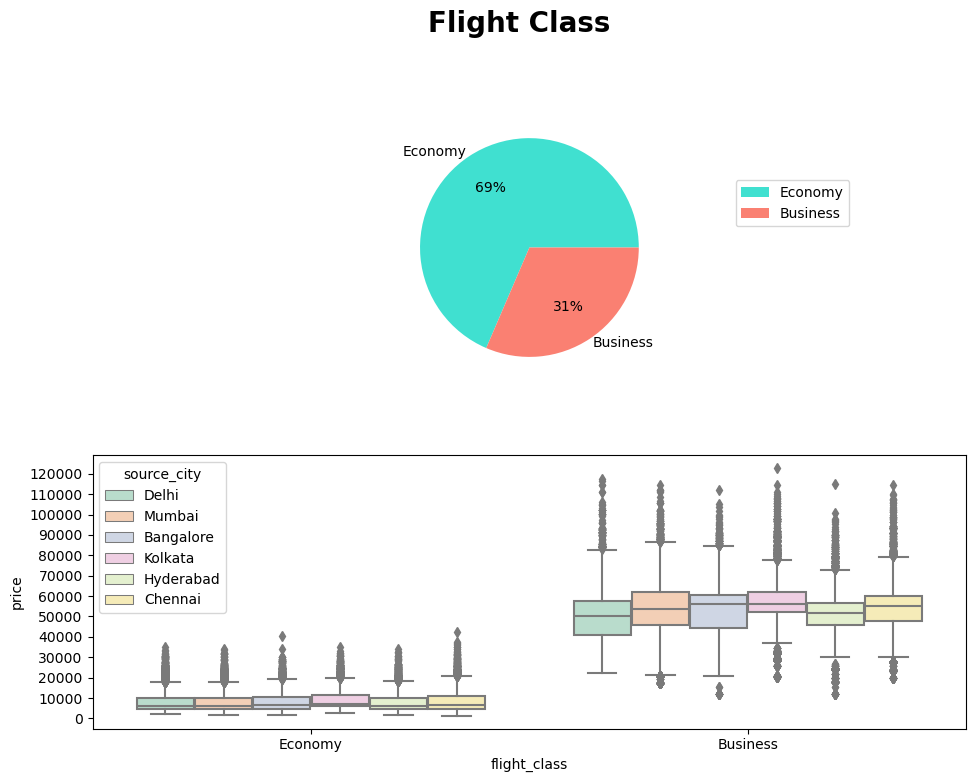

In [35]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Flight Class', fontsize=20, fontweight='bold')
plt.tight_layout(pad=3.0)

# Colors for pie chart
colors = ['turquoise', 'salmon']

# Top ax - Pie chart
labels = df.flight_class.value_counts().index.tolist()
ax[0].pie(df.flight_class.value_counts(), autopct='%.f%%', labels=labels,  pctdistance=0.65, labeldistance=1.05,colors=colors)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax - Boxplot
sns.boxplot(x='flight_class', y='price', data=df, hue='source_city',palette='Pastel2', ax=ax[1])
ax[1].set_yticks(np.arange(0, 130000, 10000))
plt.show()

In [58]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
df.groupby(['departure_time', 'flight_class'])['price'].mean()


departure_time  flight_class
Afternoon       Business        51469.722252
                Economy          7591.904075
Early_Morning   Business        52890.467984
                Economy          7687.369158
Evening         Business        53540.492510
                Economy          7502.929283
Late_Night      Business        47459.391304
                Economy          5624.793548
Morning         Business        53992.436440
                Economy          8341.933654
Night           Business        53061.571118
                Economy          7243.641776
Name: price, dtype: float64

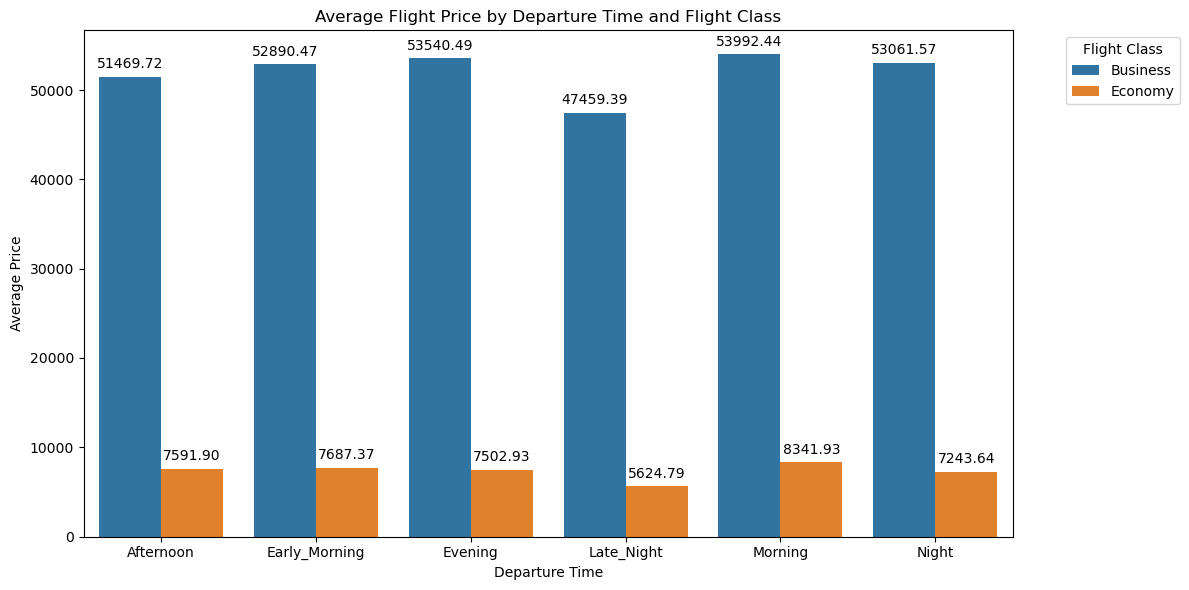

In [37]:
grp2 = df.groupby(['departure_time', 'flight_class'])['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='departure_time', y='price', hue='flight_class', data=grp2)
plt.title('Average Flight Price by Departure Time and Flight Class')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')

# Display values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),  # Adjust text position
                      textcoords = 'offset points')

# Position the legend outside the chart
plt.legend(title='Flight Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- cost of late night flight are cheaper than compared to morning 

In [38]:
grp1=df.groupby('stops')[['price', 'duration']].mean()
grp1

,price,duration
stops,,
one,24075.540058,13.615542
two_or_more,15656.174967,15.797344
zero,10057.284714,2.197402


In [39]:
grouped_df=df.groupby(['source_city', 'destination_city'])[['duration', 'price']].mean()
grouped_df

duration         price
source_city destination_city                         
Bangalore   Chennai           14.591703  23780.419580
            Delhi              9.929465  18849.850098
            Hyderabad         14.276525  22226.335600
            Kolkata           13.344128  24610.573718
            Mumbai            11.150553  24127.625289
Chennai     Bangalore         14.331922  26751.585232
            Delhi             11.062395  20401.580639
            Hyderabad         13.261720  22334.188345
            Kolkata           14.641471  24179.226415
            Mumbai            12.479218  24271.065429
Delhi       Bangalore         10.556254  19094.410631
            Chennai           12.456538  20451.990235
            Hyderabad         12.543350  18380.023077
            Kolkata           12.778711  21606.129032
            Mumbai            10.472219  20272.748770
Hyderabad   Bangalore         12.273337  22498.978061
            Chennai           13.416104  22485.869947
            Delhi             10.977442  18426.756495
            Kolkata           13.490885  21343.313946
            Mumbai            12.075659  21132.133779
Kolkata     Bangalore         14.005561  23860.896718
            Chennai           14.828710  24724.109650
            Delhi             11.769334  20738.395783
            Hyderabad         13.880074  22294.630560
            Mumbai            13.141022  23408.415882
Mumbai      Bangalore         11.777504  24217.351571
            Chennai           12.724968  24395.477040
            Delhi              9.947761  19689.253928
            Hyderabad         13.396793  21859.013191
            Kolkata           13.036546  23616.045437

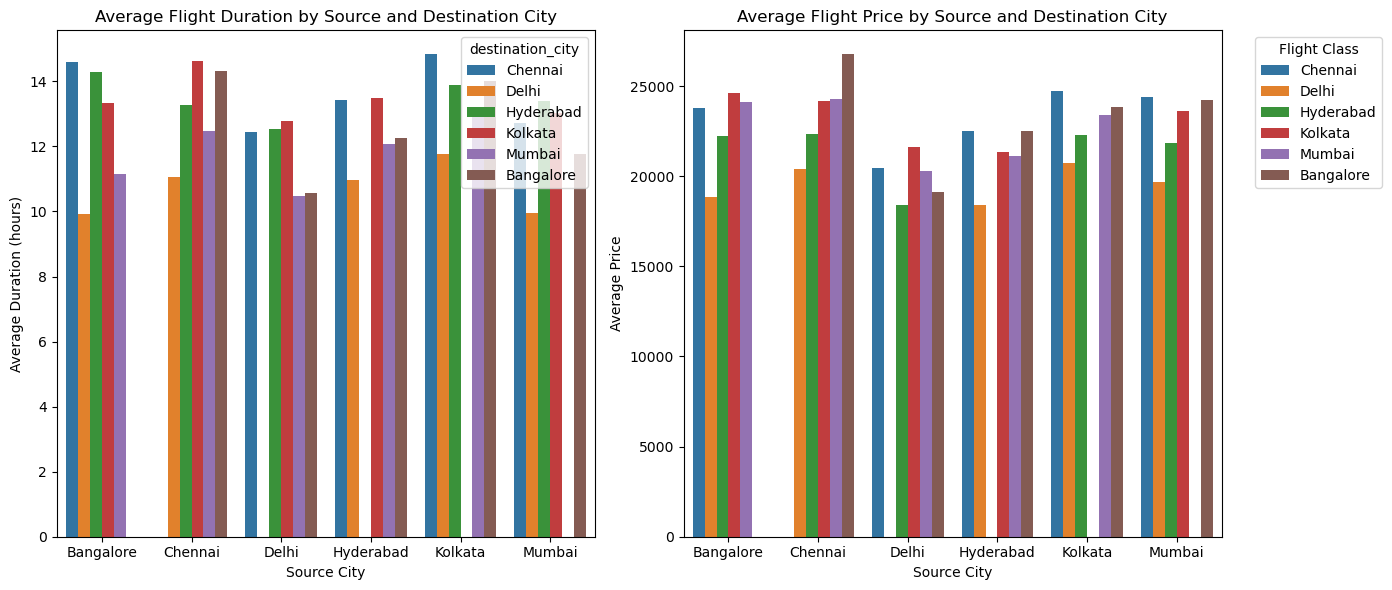

In [40]:

grouped_df = df.groupby(['source_city', 'destination_city'])[['duration', 'price']].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))

# Subplot for duration
plt.subplot(1, 2, 1)
sns.barplot(x='source_city', y='duration', hue='destination_city', data=grouped_df)
plt.title('Average Flight Duration by Source and Destination City')
plt.xlabel('Source City')
plt.ylabel('Average Duration (hours)')

# Subplot for price
plt.subplot(1, 2, 2)
sns.barplot(x='source_city', y='price', hue='destination_city', data=grouped_df)
plt.title('Average Flight Price by Source and Destination City')
plt.xlabel('Source City')
plt.ylabel('Average Price')
# Position the legend outside the chart
plt.legend(title='Flight Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [63]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

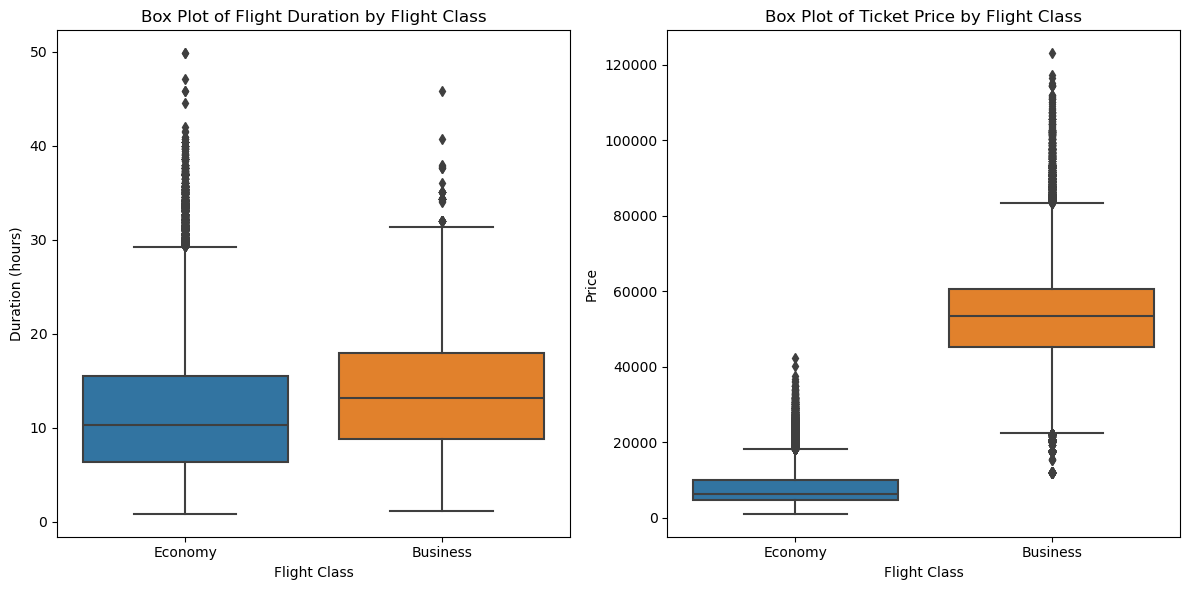

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example box plots for selected variables with 'flight_class' as hue
plt.figure(figsize=(12, 6))

# Box plot for Duration
plt.subplot(1, 2, 1)
sns.boxplot(x='flight_class', y='duration', data=df1)
plt.title('Box Plot of Flight Duration by Flight Class')
plt.ylabel('Duration (hours)')
plt.xlabel('Flight Class')

# Box plot for Price
plt.subplot(1, 2, 2)
sns.boxplot(x='flight_class', y='price', data=df1)
plt.title('Box Plot of Ticket Price by Flight Class')
plt.ylabel('Price')
plt.xlabel('Flight Class')

plt.tight_layout()
plt.show()


In [ ]:
# Storing a copy of data :

df1=df.copy()


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [13]:
df['departure_time'] = df['departure_time'].astype('category')
df['stops'] = df['stops'].astype('category')
df['arrival_time'] = df['arrival_time'].astype('category')
df['flight_class'] = df['flight_class'].astype('category')


In [14]:
le = LabelEncoder()
df['source_city'] = le.fit_transform(df['source_city'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['flight_class'] = le.fit_transform(df['flight_class'])
df['airline'] = le.fit_transform(df['airline'])

In [15]:
#Reduce memory usage by converting integers and floats to smaller types

df['duration'] = df['duration'].astype('float32')
df['days_left'] = df['days_left'].astype('int8')
df['price'] = df['price'].astype('int32')


In [16]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


### Encoding categorical columns :

In [11]:
# Copying original data 

df1=df.copy()

In [37]:
# col : airline

df.airline = df.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6  
    }
)

In [45]:
# col : source_city
df.source_city = df.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        
        'Chennai' : 6
    }
)

In [46]:
# col : departure_time
df.departure_time = df.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2, 
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5, 
        'Late_Night' : 6
    }
)

In [47]:
# col : stops
df.stops = df.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [48]:
# col : arrival_time


# Reshaping DataFrame
df.arrival_time = df.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)


In [49]:
# col : destination_city
df.destination_city = df.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [50]:
# col : flight_class
df.flight_class = df.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [21]:
df.head()

# Encoded df

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [17]:

df1.head()
# Original data

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


D:\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


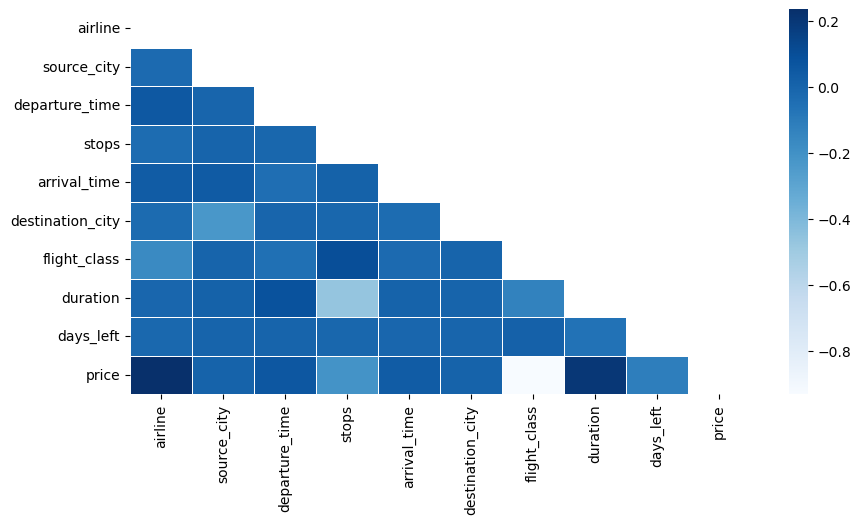

In [23]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white',annot_kws={'size': 10}, mask=np.triu(corr), cmap='Blues')
plt.show()

In [ ]:
# corr: The correlation matrix to be visualized.
# annot=True: Displays the correlation coefficients in each cell of the heatmap.
# fmt='.2f': Formats the displayed numbers to two decimal places.
# linewidths=0.5: Width of the lines that divide each cell.
# linecolor='white': Color of the lines that divide each cell.
# mask=np.triu(corr): Masks the upper triangle of the heatmap to avoid redundancy (since the correlation matrix is symmetric).

In [56]:
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [18]:
# copy of encoded data :
df_cp=df.copy()

In [40]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

In [60]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
299257,5,1,4,0,5,3,0,10.17,30,66779
299258,5,1,4,0,2,3,0,10.17,30,69265
299259,5,1,4,0,5,3,0,10.17,30,79099
299260,5,1,1,0,2,3,0,10.00,30,81585


In [49]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

## Machine Learning Models: 

In [19]:
# loading libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [20]:
# Select necessary columns 
X = df[['source_city', 'destination_city', 'flight_class', 'departure_time','days_left','stops']]  # Features
y = df['price']  # Target

In [21]:
# Split the data into train and test sets (this split will be reused)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define a threshold for binary classification
threshold = y_train.median()
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Dictionary to store the results
results = {}

### Linear Regression :

In [34]:
# Linear Regression (for regression)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_pred))
lin_reg_r2 = r2_score(y_test, lin_reg_pred)
results['Linear Regression R² Score'] = round(lin_reg_r2*100,2)
print('RMSE score:', lin_reg_rmse)
print('R² score:', lin_reg_r2)


RMSE score: 8146.363343565722
R² score: 0.8723643887094492


Linear Regression:

RMSE: 7865.32
R² Score: 0.88
Linear regression is used for predicting continuous values. The RMSE value indicates the average error in the price prediction, while the R² score shows that 88% of the variance in the price is explained by the model.

### Logistic Regression :

In [35]:
# Logistic Regression (for classification)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_class)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test_class, log_reg_pred)
results['Logistic Regression'] = round(log_reg_acc*100,2)

print('Accuracy score for logistic :',round(log_reg_acc*100,2))

Accuracy score for logistic : 82.23


Logistic Regression:

Accuracy: 0.88
This model is used for binary classification. The accuracy score is 0.88, indicating that it correctly predicts the price category (above or below the median) 88% of the time.


### Decision Tree : 

In [36]:
# Decision Tree (for classification)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train_class)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test_class, dt_pred)
results['Decision Tree'] = round(dt_acc*100,2)

print('Accuracy score for Decision tree :',round(dt_acc*100,2))

Accuracy score for Decision tree : 83.13


Decision Tree:

Accuracy: 0.93
This model also performs classification and has a high accuracy of 0.93, indicating effective classification performance.

### Random Forest :

In [37]:
# Random Forest (for classification)
rf = RandomForestClassifier()
rf.fit(X_train, y_train_class)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test_class, rf_pred)
results['Random Forest'] =round(rf_acc*100,2)

print('Accuracy score for Decision tree :',round(rf_acc*100,2))

Accuracy score for Decision tree : 82.87


Decision Tree:

Accuracy: 0.93
This model also performs classification and has a high accuracy of 0.93, indicating effective classification performance.

### KNN :

In [38]:
# K-Nearest Neighbors (for classification)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_class)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test_class, knn_pred)
results['K-Nearest Neighbors'] = round(knn_acc*100,2)

print('Accuracy score for Decision tree :',round(knn_acc*100,2))

Accuracy score for Decision tree : 82.18


Inference :

Accuracy: 0.89
KNN is a classification model that performs well with an accuracy of 0.89, indicating it correctly classifies the price category 89% of the time.


### Results :

In [39]:
results

{'Linear Regression R² Score': 87.24,
 'Logistic Regression': 82.23,
 'Decision Tree': 83.13,
 'Random Forest': 82.87,
 'K-Nearest Neighbors': 82.18}

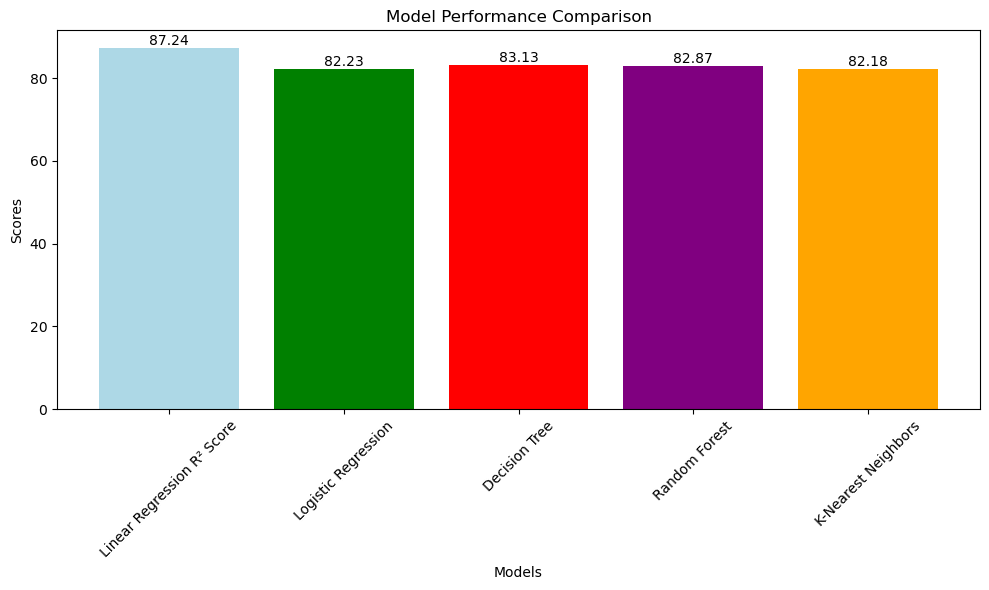

In [40]:
# Display results in a bar chart
labels = list(results.keys())
values = list(results.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['lightblue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')

# Adding the scores on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}' if isinstance(height, (int, float)) else f'{height:.2f}',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Inference
- Random Forest has the highest accuracy among the classification models, making it the most effective for classifying the price category in this dataset.
- Linear Regression shows a strong performance with an R² score of 0.88, indicating it effectively predicts the price.
- The bar chart visually compares the performance of all models, making it easy to identify which model performs best for each task.

In [41]:
## code for sampled data 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Sample 10% of the data
df_sampled = df.sample(frac=0.5, random_state=42)

# Select necessary columns
X = df_sampled[['source_city', 'destination_city', 'flight_class', 'departure_time', 'duration','days_left']]  # Features
y = df_sampled['price']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression (for classification of price into categories, example: high/low)
# Assuming a binary classification for simplicity, we can define a threshold to categorize price
threshold = y_train.median()
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_class)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test_class, log_reg_pred)
print(f'Logistic Regression Accuracy: {log_reg_acc:.2f}')

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_pred))
print(f'Linear Regression RMSE: {lin_reg_rmse:.2f}')

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train_class)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test_class, rf_pred)
print(f'Random Forest Accuracy: {rf_acc:.2f}')

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_class)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test_class, knn_pred)
print(f'K-Nearest Neighbors Accuracy: {knn_acc:.2f}')

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train_class)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test_class, dt_pred)
print(f'Decision Tree Accuracy: {dt_acc:.2f}')

Logistic Regression Accuracy: 0.88
Linear Regression RMSE: 7818.47
Random Forest Accuracy: 0.93
K-Nearest Neighbors Accuracy: 0.86
Decision Tree Accuracy: 0.91


### Prediction :

In [57]:
import joblib

# Save the model
joblib.dump(rf, 'random_forest_model.pkl')

# saving best model ie Random forest 

['random_forest_model.pkl']

In [111]:
pip install Flask joblib pandas


Note: you may need to restart the kernel to use updated packages.


In [114]:
cd path/to/your/flask/app

python app.py


SyntaxError: invalid syntax (3382299554.py, line 1)

In [116]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

In [118]:
df1.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder


# Fit encoders for all relevant columns
le_source_city = LabelEncoder()
le_source_city.fit(df3['source_city'])

le_destination_city = LabelEncoder()
le_destination_city.fit(df3['destination_city'])

le_flight_class = LabelEncoder()
le_flight_class.fit(df3['flight_class'])

le_departure_time = LabelEncoder()
le_departure_time.fit(df3['departure_time'])

le_stops = LabelEncoder()
le_stops.fit(df3['stops'])  # Fit the stops encoder

# Retrieve mappings
source_city_mapping = dict(zip(le_source_city.classes_, le_source_city.transform(le_source_city.classes_)))
destination_city_mapping = dict(zip(le_destination_city.classes_, le_destination_city.transform(le_destination_city.classes_)))
flight_class_mapping = dict(zip(le_flight_class.classes_, le_flight_class.transform(le_flight_class.classes_)))
departure_time_mapping = dict(zip(le_departure_time.classes_, le_departure_time.transform(le_departure_time.classes_)))
stops_mapping = dict(zip(le_stops.classes_, le_stops.transform(le_stops.classes_)))  # Stops mapping

print("Source City Encoding:")
print(source_city_mapping)

print("Destination City Encoding:")
print(destination_city_mapping)

print("Flight Class Encoding:")
print(flight_class_mapping)

print("Departure Time Encoding:")
print(departure_time_mapping)

print("Stops Encoding:")
print(stops_mapping)


Source City Encoding:
{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
Destination City Encoding:
{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
Flight Class Encoding:
{'Business': 0, 'Economy': 1}
Departure Time Encoding:
{'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5}
Stops Encoding:
{'one': 0, 'two_or_more': 1, 'zero': 2}


In [55]:
df3=df1.copy()

In [129]:
df3

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
299257,Vistara,Chennai,Morning,one,Night,Hyderabad,Business,10.17,30,66779
299258,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.17,30,69265
299259,Vistara,Chennai,Morning,one,Night,Hyderabad,Business,10.17,30,79099
299260,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,30,81585


In [62]:
import joblib
import pandas as pd
from flask import Flask, render_template_string, request
from threading import Thread
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Initialize the Flask app
app = Flask(__name__)

# HTML template
HTML_TEMPLATE = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Flight Price Prediction</title>
</head>
<body>
    <h1>Flight Price Prediction</h1>
    <form action="/predict" method="POST">
        <label for="source_city">Source City:</label>
        <select name="source_city" required>
            <option value="0">Bangalore</option>
            <option value="1">Chennai</option>
            <option value="2">Delhi</option>
            <option value="3">Hyderabad</option>
            <option value="4">Kolkata</option>
            <option value="5">Mumbai</option>
        </select><br>

        <label for="destination_city">Destination City:</label>
        <select name="destination_city" required>
            <option value="0">Bangalore</option>
            <option value="1">Chennai</option>
            <option value="2">Delhi</option>
            <option value="3">Hyderabad</option>
            <option value="4">Kolkata</option>
            <option value="5">Mumbai</option>
        </select><br>

        <label for="flight_class">Flight Class:</label>
        <select name="flight_class" required>
            <option value="0">Business</option>
            <option value="1">Economy</option>
        </select><br>

        <label for="departure_time">Departure Time:</label>
        <select name="departure_time" required>
            <option value="0">Afternoon</option>
            <option value="1">Early_Morning</option>
            <option value="2">Evening</option>
            <option value="3">Late_Night</option>
            <option value="4">Morning</option>
            <option value="5">Night</option>
        </select><br>

        <label for="days_left">Days Left to Travel:</label>
        <input type="number" name="days_left" min="1" max="50" required><br>

        <label for="stops">Number of Stops:</label>
        <select name="stops" required>
            <option value="0">Non-stop</option>
            <option value="1">1 Stop</option>
            <option value="2">2 Stops</option>
            <option value="3">3 Stops</option>
        </select><br>

        <input type="submit" value="Predict">
    </form>

    {% if prediction %}
        <h2>Predicted Price Category: {{ prediction }}</h2>
    {% endif %}
</body>
</html>
"""

@app.route('/')
def home():
    return render_template_string(HTML_TEMPLATE)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get user input from form
        user_data = [
            int(request.form['source_city']),
            int(request.form['destination_city']),
            int(request.form['flight_class']),
            int(request.form['departure_time']),
            int(request.form['days_left']),
            int(request.form['stops'])
        ]

        # Create DataFrame for the input
        input_data = pd.DataFrame([user_data], columns=['source_city', 'destination_city', 'flight_class', 'departure_time', 'days_left', 'stops'])
        
        print("Input data received:", input_data)  # Debugging line

        # Make prediction
        prediction = model.predict(input_data)

        # Return prediction
        return render_template_string(HTML_TEMPLATE, prediction=prediction[0])
    
    except KeyError as e:
        return f"Missing data: {e}", 400
    except ValueError as e:
        return f"Invalid input: {e}", 400
    except Exception as e:
        return f"Error: {str(e)}", 500


def run_app():
    app.run(debug=True, use_reloader=False)

# Run the Flask app in a separate thread
Thread(target=run_app).start()


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [12/Jul/2024 14:59:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Jul/2024 15:00:09] "POST /predict HTTP/1.1" 400 -


#### To view :
- Open your web browser and go to http://127.0.0.1:5000/ to access the application.

In [45]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

In [54]:
df3.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [ ]:
import pandas as pd
import joblib
from flask import Flask, render_template_string, request

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Initialize the Flask app
app = Flask(__name__)

# Encoding mappings
source_encoding = {'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
destination_encoding = {'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
flight_class_encoding = {'Business': 0, 'Economy': 1}
departure_time_encoding = {
    'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5
}
stops_encoding = {'zero': 2, 'one': 0, 'two_or_more': 1}

# HTML template
HTML_TEMPLATE = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Flight Price Prediction</title>
</head>
<body>
    <h1>Flight Price Prediction</h1>
    <form action="/predict" method="POST">
        <label for="source_city">Source City:</label>
        <select name="source_city" required>
            <option value="0">Bangalore</option>
            <option value="1">Chennai</option>
            <option value="2">Delhi</option>
            <option value="3">Hyderabad</option>
            <option value="4">Kolkata</option>
            <option value="5">Mumbai</option>
        </select><br>

        <label for="destination_city">Destination City:</label>
        <select name="destination_city" required>
            <option value="0">Bangalore</option>
            <option value="1">Chennai</option>
            <option value="2">Delhi</option>
            <option value="3">Hyderabad</option>
            <option value="4">Kolkata</option>
            <option value="5">Mumbai</option>
        </select><br>

        <label for="flight_class">Flight Class:</label>
        <select name="flight_class" required>
            <option value="0">Business</option>
            <option value="1">Economy</option>
        </select><br>

        <label for="departure_time">Departure Time:</label>
        <select name="departure_time" required>
            <option value="0">Afternoon</option>
            <option value="1">Early_Morning</option>
            <option value="2">Evening</option>
            <option value="3">Late_Night</option>
            <option value="4">Morning</option>
            <option value="5">Night</option>
        </select><br>

        <label for="days_left">Days Left:</label>
        <input type="number" name="days_left" min="1" required><br>

        <label for="stops">Number of Stops:</label>
        <select name="stops" required>
            <option value="zero">Non-stop</option>
            <option value="one">1 Stop</option>
            <option value="two_or_more">2 or more Stops</option>
        </select><br>

        <input type="submit" value="Predict">
    </form>

    {% if prediction is not none %}
        <h2>Predicted Price Category: {{ prediction }}</h2>
    {% endif %}
</body>
</html>
"""

@app.route('/')
def home():
    return render_template_string(HTML_TEMPLATE)

@app.route('/predict', methods=['POST'])
def predict():
    # Get user input
    source_city = int(request.form['source_city'])
    destination_city = int(request.form['destination_city'])
    flight_class = int(request.form['flight_class'])
    departure_time = int(request.form['departure_time'])
    days_left = int(request.form['days_left'])
    stops = stops_encoding[request.form['stops']]

    # Prepare input for prediction
    input_data = pd.DataFrame([[source_city, destination_city, flight_class, departure_time, days_left, stops]],
                               columns=['source_city', 'destination_city', 'flight_class', 'departure_time', 'days_left', 'stops'])

    # Make prediction
    prediction = model.predict(input_data)

    return render_template_string(HTML_TEMPLATE, prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)
